In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation

In [3]:
Xmin, Xmax, Npoints_x = 0.,1.,10
Ymin, Ymax, Npoints_y = 0.,2.,10
Tmin, Tmax, Npoints_t = 0.,5.,200

x = np.linspace(Xmin, Xmax, Npoints_x)
y = np.linspace(Ymin, Ymax, Npoints_y)
t = np.linspace(Tmin, Tmax, Npoints_t)

deltat = (Tmax-Tmin)/(Npoints_t-1)
deltax = (Xmax-Xmin)/(Npoints_x-1)
deltay = (Ymax-Ymin)/(Npoints_y-1)

# definiendo conductividad
alpha = 0.03
beta = 0.03

lambda_ = alpha*deltat/deltax**2
mu_ = beta*deltat/deltay**2

print(lambda_,mu_)

0.06105527638190955 0.015263819095477388


In [4]:
# Definamos condicion inicial
def Ti(x,y):
    return np.sin(np.pi*(x+y))

In [5]:
# Mapa de Temperatura

T = np.zeros((Npoints_t,Npoints_x,Npoints_y))

for i in range(len(x)):
    for j in range(len(y)):
        T[0,i,j] = Ti(x[i],y[j])

In [6]:
def h1(y,t):
    return 1.
def h2(y,t):
    return 1*np.sin(2*t)
    return 2.
def h3(x,t):
    return 1.
def h4(x,t):
    return 3.

In [7]:
for j in range(Npoints_y):
    T[:,0,j] = h1(y[j],t[j])
    T[:,-1,j] = h2(y[j],t[j])
    
for i in range(Npoints_x):
    T[:,i,0] = h3(x[i],t[i])
    T[:,i,-1] = h4(x[i],t[i])

In [8]:
for l in range(1,len(t)):
    
    # Tocar fronteras
    T[l,-1,:] = h2(t[l],t[l])
    
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] \
            + lambda_*(T[l-1,i+1,j]+T[l-1,i-1,j]) \
            + mu_*(T[l-1,i,j+1]+T[l-1,i,j-1])

<IPython.core.display.Javascript object>


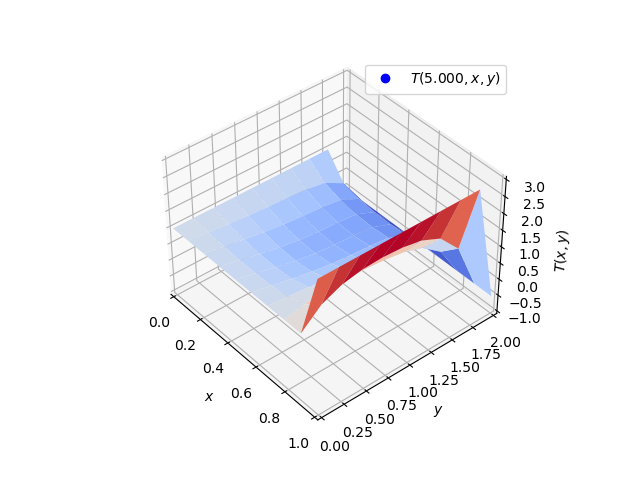

In [9]:
Nframes = len(t) 

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 40, azim = -40)

X, Y = np.meshgrid(x,y)

def init():
    
    ax.set_xlim3d(Xmin, Xmax)
    ax.set_ylim3d(Ymin, Ymax)
    ax.set_zlim3d(-1,3)

    ax.set_xlabel('$x$', fontsize=10)
    ax.set_ylabel('$y$', fontsize=10)
    ax.set_zlabel(r'$T(x,y)$', fontsize=10)
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot_surface(X, Y, T[i,:,:], cmap=cm.coolwarm) 
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle='none', c='b', marker='o')
    plot = ax.legend([fake2Dline], [r'$T(%.3f,x,y)$' %(t[i])], numpoints=1)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=Nframes, init_func=init)

In [23]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800 )
Animation.save( 'Heat2D.mp4', writer=writer )

KeyboardInterrupt: 